In [55]:
from pathlib import Path

import torch
from gpytorch.kernels import RBFKernel
from matplotlib import pyplot as plt
import numpy as np

from famgpytorch.kernels import RBFKernelApprox

%matplotlib inline
%load_ext autoreload
%autoreload 2
torch.manual_seed(42)

PLOT_DIR_PATH = Path("temp/hyperparameters/plots")

SMALL_SIZE = 13
MEDIUM_SIZE = 18
BIGGER_SIZE = 21

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


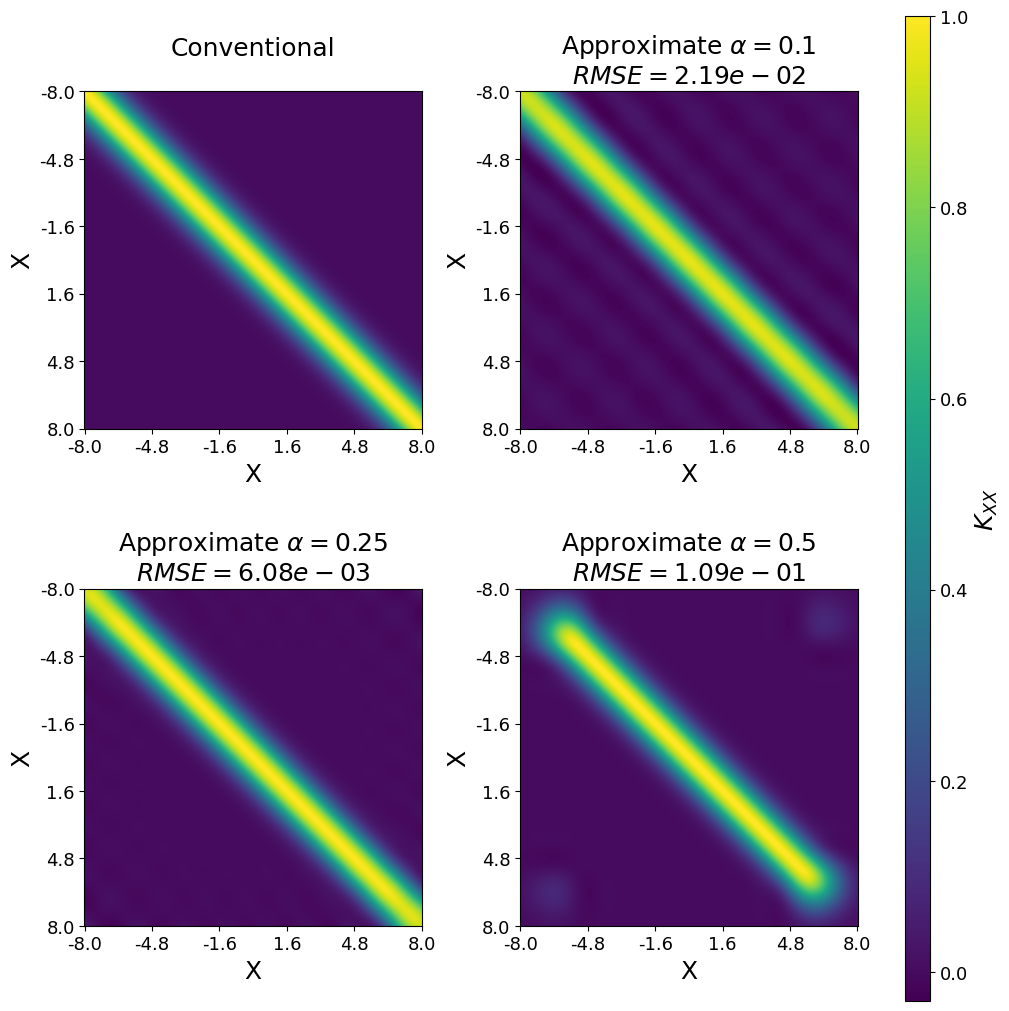

In [56]:
nb_training_points = 1000
x_min = -8
x_max = 8

train_x = torch.linspace(x_min, x_max, nb_training_points).reshape(-1,1)

conv_rbf = RBFKernel()
approx_rbf = RBFKernelApprox(number_of_eigenvalues=15)

with torch.no_grad():
    conv_rbf.lengthscale = 1
    approx_rbf.lengthscale = 1

    conv_covar = conv_rbf.forward(train_x, train_x).to_dense()

    approx_rbf.alpha = 0.1
    approx_covar_0_1 = approx_rbf.forward(train_x, train_x).to_dense()

    approx_rbf.alpha = 0.25
    approx_covar_0_25 = approx_rbf.forward(train_x, train_x).to_dense()

    approx_rbf.alpha = 0.5
    approx_covar_0_5 = approx_rbf.forward(train_x, train_x).to_dense()

    rmse_0_1 = torch.sqrt(torch.mean((conv_covar - approx_covar_0_1) ** 2))
    rmse_0_25 = torch.sqrt(torch.mean((conv_covar - approx_covar_0_25) ** 2))
    rmse_0_5 = torch.sqrt(torch.mean((conv_covar - approx_covar_0_5) ** 2))

    fig, axs = plt.subplots(2, 2, figsize=(10, 10), layout='constrained')
    vmin = torch.min(torch.cat((conv_covar, approx_covar_0_1, approx_covar_0_25, approx_covar_0_5))).item()
    vmax = torch.max(torch.cat((conv_covar, approx_covar_0_1, approx_covar_0_25, approx_covar_0_5))).item()

    for ax, covar, title in zip(
        axs.reshape(4),
        [
            conv_covar.to('cpu'),
            approx_covar_0_1.to('cpu'),
            approx_covar_0_25.to('cpu'),
            approx_covar_0_5.to('cpu')
        ],
        [
            "Conventional\n",
            f"Approximate $\\alpha = 0.1$\n$RMSE = {rmse_0_1.item():.2e}$",
            f"Approximate $\\alpha = 0.25$\n$RMSE = {rmse_0_25.item():.2e}$",
            f"Approximate $\\alpha = 0.5$\n$RMSE = {rmse_0_5.item():.2e}$"
        ]
    ):
        im = ax.imshow(covar.numpy(), cmap=plt.colormaps['viridis'], vmin=vmin, vmax=vmax)

        ax.set_title(title)
        ax.set_xlabel('X')
        ax.set_ylabel('X')
        ax.set_xticks(np.linspace(0, nb_training_points - 1, min(nb_training_points, 6)))
        ax.set_yticks(np.linspace(0, nb_training_points - 1, min(nb_training_points, 6)))
        ax.set_xticklabels(np.round(np.linspace(x_min, x_max, min(nb_training_points, 6)), 2))
        ax.set_yticklabels(np.round(np.linspace(x_min, x_max, min(nb_training_points, 6)), 2))
        ax.grid(False)


    cbar = fig.colorbar(im, ax=axs[:, 1], pad=0.1, aspect=40)
    cbar.ax.set_ylabel('$K_{XX}$')

    path = Path(PLOT_DIR_PATH, f"alpha_l1.png")
    if not path.parent.exists():
        path.parent.mkdir(parents=True)
    plt.savefig(path)

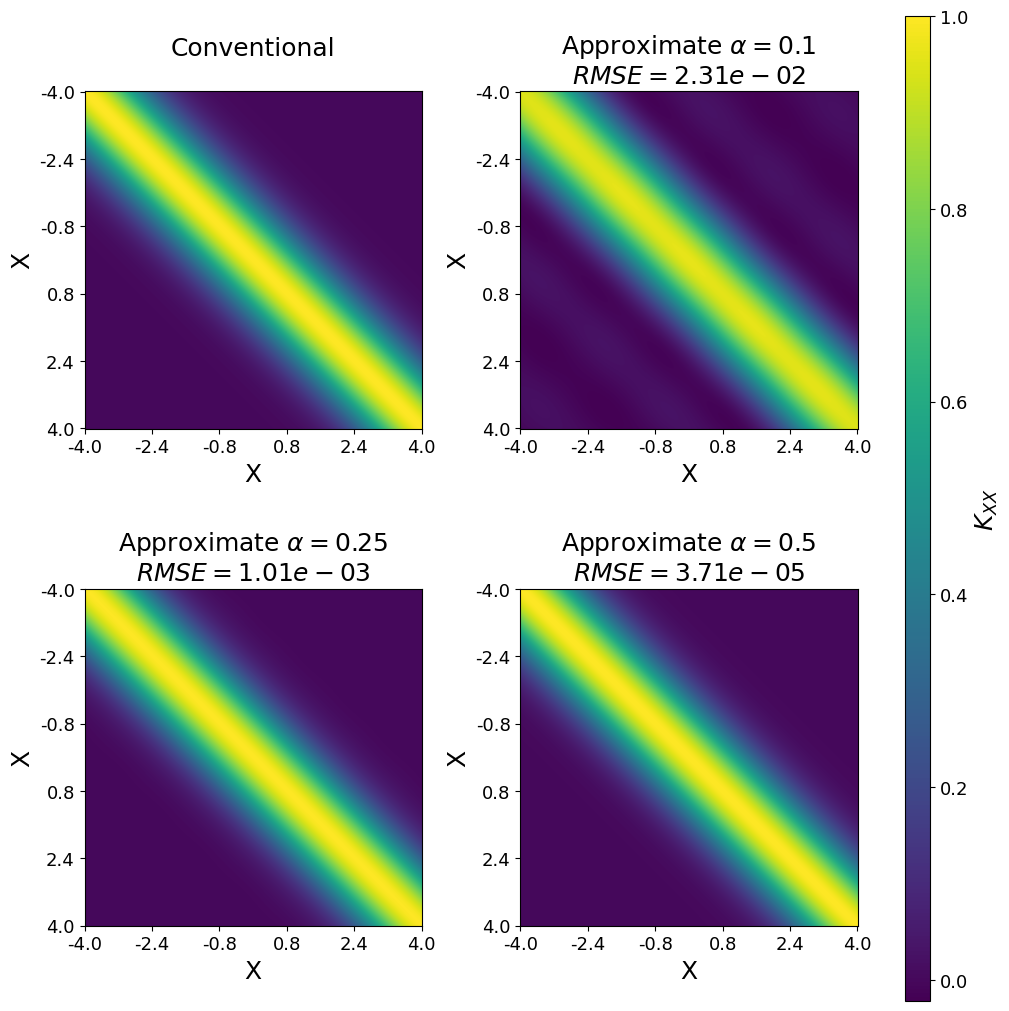

In [57]:
nb_training_points = 1000
x_min = -4
x_max = 4

train_x = torch.linspace(x_min, x_max, nb_training_points).reshape(-1,1)

conv_rbf = RBFKernel()
approx_rbf = RBFKernelApprox(number_of_eigenvalues=15)

with torch.no_grad():
    conv_rbf.lengthscale = 1
    approx_rbf.lengthscale = 1

    conv_covar = conv_rbf.forward(train_x, train_x).to_dense()

    approx_rbf.alpha = 0.1
    approx_covar_0_1 = approx_rbf.forward(train_x, train_x).to_dense()

    approx_rbf.alpha = 0.25
    approx_covar_0_25 = approx_rbf.forward(train_x, train_x).to_dense()

    approx_rbf.alpha = 0.5
    approx_covar_0_5 = approx_rbf.forward(train_x, train_x).to_dense()

    rmse_0_1 = torch.sqrt(torch.mean((conv_covar - approx_covar_0_1) ** 2))
    rmse_0_25 = torch.sqrt(torch.mean((conv_covar - approx_covar_0_25) ** 2))
    rmse_0_5 = torch.sqrt(torch.mean((conv_covar - approx_covar_0_5) ** 2))

    fig, axs = plt.subplots(2, 2, figsize=(10, 10), layout='constrained')
    vmin = torch.min(torch.cat((conv_covar, approx_covar_0_1, approx_covar_0_25, approx_covar_0_5))).item()
    vmax = torch.max(torch.cat((conv_covar, approx_covar_0_1, approx_covar_0_25, approx_covar_0_5))).item()

    for ax, covar, title in zip(
        axs.reshape(4),
        [
            conv_covar.to('cpu'),
            approx_covar_0_1.to('cpu'),
            approx_covar_0_25.to('cpu'),
            approx_covar_0_5.to('cpu')
        ],
        [
            "Conventional\n",
            f"Approximate $\\alpha = 0.1$\n$RMSE = {rmse_0_1.item():.2e}$",
            f"Approximate $\\alpha = 0.25$\n$RMSE = {rmse_0_25.item():.2e}$",
            f"Approximate $\\alpha = 0.5$\n$RMSE = {rmse_0_5.item():.2e}$"
        ]
    ):
        im = ax.imshow(covar.numpy(), cmap=plt.colormaps['viridis'], vmin=vmin, vmax=vmax)

        ax.set_title(title)
        ax.set_xlabel('X')
        ax.set_ylabel('X')
        ax.set_xticks(np.linspace(0, nb_training_points - 1, min(nb_training_points, 6)))
        ax.set_yticks(np.linspace(0, nb_training_points - 1, min(nb_training_points, 6)))
        ax.set_xticklabels(np.round(np.linspace(x_min, x_max, min(nb_training_points, 6)), 2))
        ax.set_yticklabels(np.round(np.linspace(x_min, x_max, min(nb_training_points, 6)), 2))
        ax.grid(False)


    cbar = fig.colorbar(im, ax=axs[:, 1], pad=0.1, aspect=40)
    cbar.ax.set_ylabel('$K_{XX}$')

    path = Path(PLOT_DIR_PATH, f"alpha_l1_x4.png")
    if not path.parent.exists():
        path.parent.mkdir(parents=True)
    plt.savefig(path)

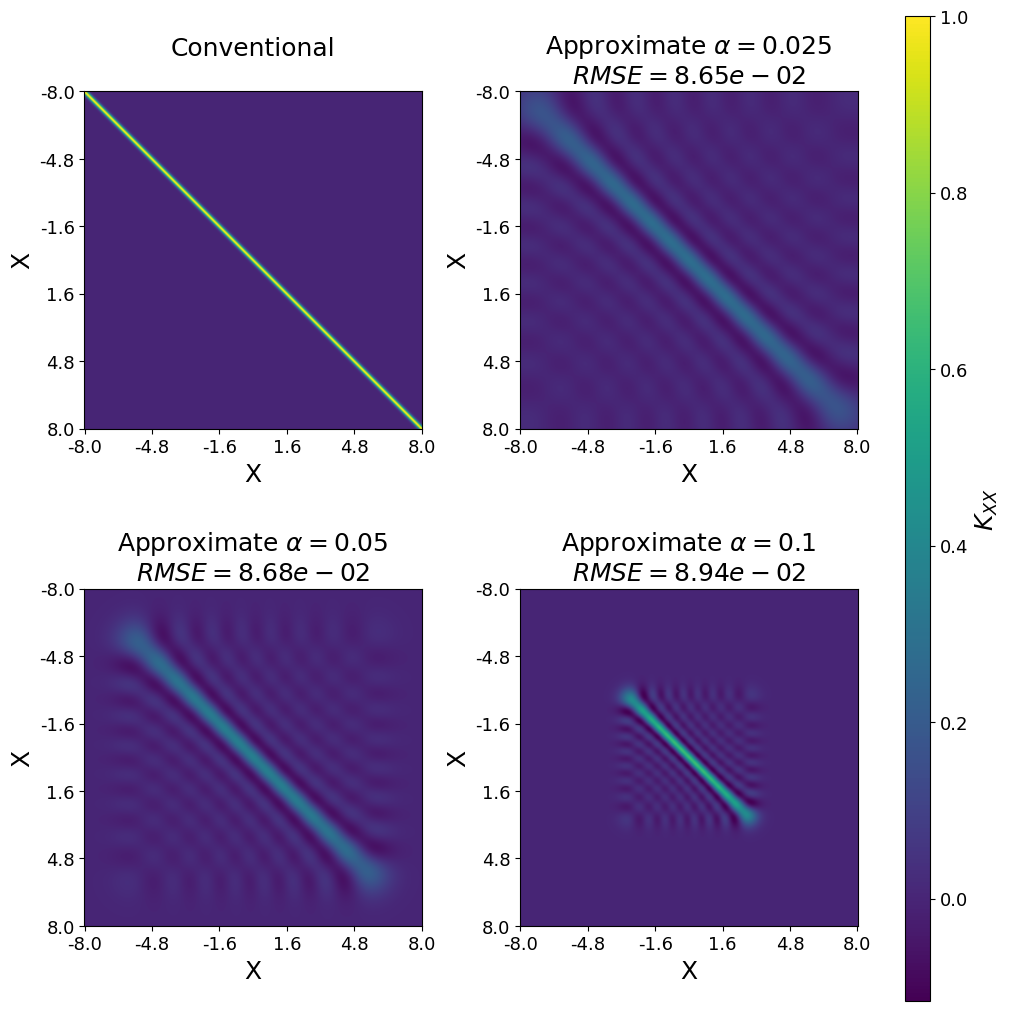

In [58]:
nb_training_points = 1000
x_min = -8
x_max = 8

train_x = torch.linspace(x_min, x_max, nb_training_points).reshape(-1,1)

conv_rbf = RBFKernel()
approx_rbf = RBFKernelApprox(number_of_eigenvalues=15)

with torch.no_grad():
    conv_rbf.lengthscale = 0.1
    approx_rbf.lengthscale = 0.1

    conv_covar = conv_rbf.forward(train_x, train_x).to_dense()

    approx_rbf.alpha = 0.03
    approx_covar_0_03 = approx_rbf.forward(train_x, train_x).to_dense()

    approx_rbf.alpha = 0.05
    approx_covar_0_05 = approx_rbf.forward(train_x, train_x).to_dense()

    approx_rbf.alpha = 0.2
    approx_covar_0_1 = approx_rbf.forward(train_x, train_x).to_dense()

    rmse_0_03 = torch.sqrt(torch.mean((conv_covar - approx_covar_0_03) ** 2))
    rmse_0_05 = torch.sqrt(torch.mean((conv_covar - approx_covar_0_05) ** 2))
    rmse_0_1 = torch.sqrt(torch.mean((conv_covar - approx_covar_0_1) ** 2))

    fig, axs = plt.subplots(2, 2, figsize=(10, 10), layout='constrained')
    vmin = torch.min(torch.cat((conv_covar, approx_covar_0_03, approx_covar_0_05, approx_covar_0_1))).item()
    vmax = torch.max(torch.cat((conv_covar, approx_covar_0_03, approx_covar_0_05, approx_covar_0_1))).item()

    for ax, covar, title in zip(
        axs.reshape(4),
        [
            conv_covar.to('cpu'),
            approx_covar_0_03.to('cpu'),
            approx_covar_0_05.to('cpu'),
            approx_covar_0_1.to('cpu')
        ],
        [
            "Conventional\n",
            f"Approximate $\\alpha = 0.025$\n$RMSE = {rmse_0_03.item():.2e}$",
            f"Approximate $\\alpha = 0.05$\n$RMSE = {rmse_0_05.item():.2e}$",
            f"Approximate $\\alpha = 0.1$\n$RMSE = {rmse_0_1.item():.2e}$"
        ]
    ):
        im = ax.imshow(covar.numpy(), cmap=plt.colormaps['viridis'], vmin=vmin, vmax=vmax)

        ax.set_title(title)
        ax.set_xlabel('X')
        ax.set_ylabel('X')
        ax.set_xticks(np.linspace(0, nb_training_points - 1, min(nb_training_points, 6)))
        ax.set_yticks(np.linspace(0, nb_training_points - 1, min(nb_training_points, 6)))
        ax.set_xticklabels(np.round(np.linspace(x_min, x_max, min(nb_training_points, 6)), 2))
        ax.set_yticklabels(np.round(np.linspace(x_min, x_max, min(nb_training_points, 6)), 2))
        ax.grid(False)


    cbar = fig.colorbar(im, ax=axs[:, 1], pad=0.1, aspect=40)
    cbar.ax.set_ylabel('$K_{XX}$')

    path = Path(PLOT_DIR_PATH, f"alpha_l0_1.png")
    if not path.parent.exists():
        path.parent.mkdir(parents=True)
    plt.savefig(path)

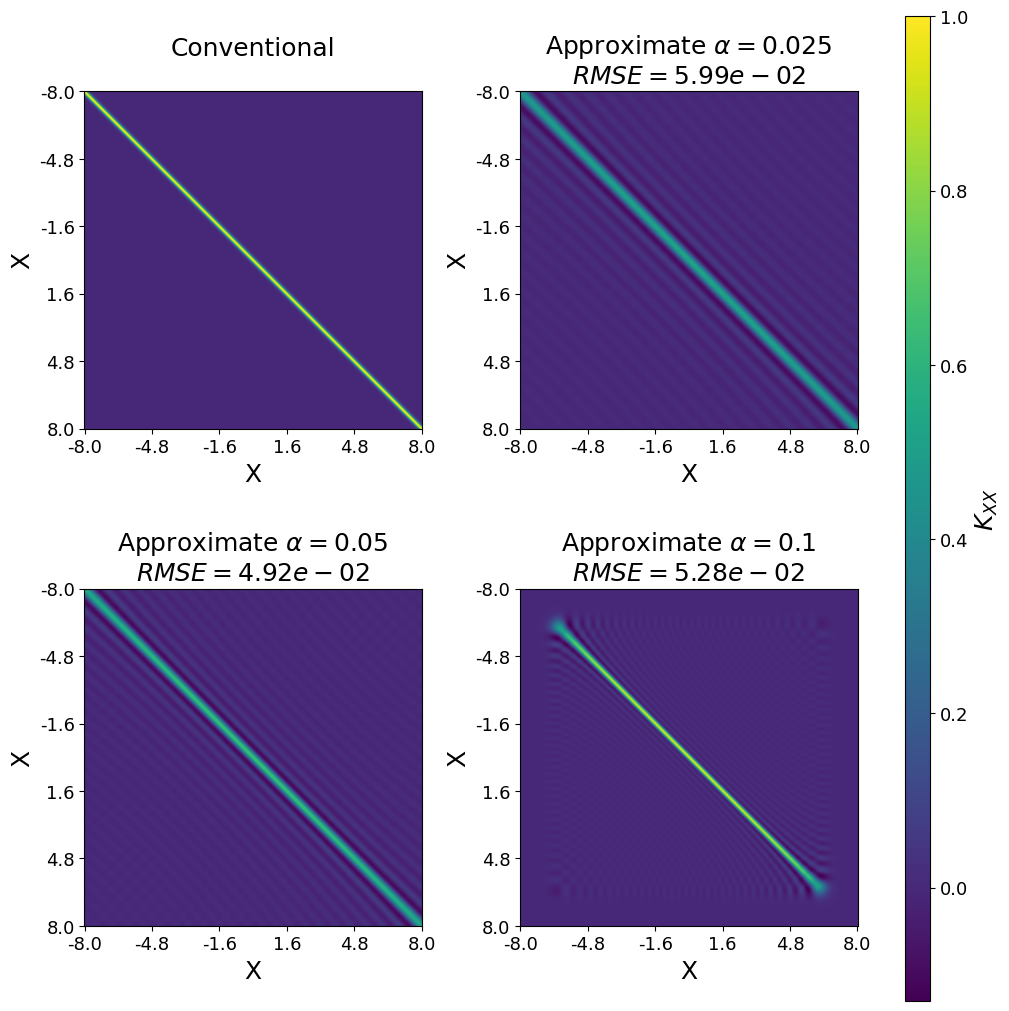

In [59]:
nb_training_points = 1000
x_min = -8
x_max = 8

train_x = torch.linspace(x_min, x_max, nb_training_points).reshape(-1,1)

conv_rbf = RBFKernel()
approx_rbf = RBFKernelApprox(number_of_eigenvalues=60)

with torch.no_grad():
    conv_rbf.lengthscale = 0.1
    approx_rbf.lengthscale = 0.1

    conv_covar = conv_rbf.forward(train_x, train_x).to_dense()

    approx_rbf.alpha = 0.03
    approx_covar_0_03 = approx_rbf.forward(train_x, train_x).to_dense()

    approx_rbf.alpha = 0.05
    approx_covar_0_05 = approx_rbf.forward(train_x, train_x).to_dense()

    approx_rbf.alpha = 0.2
    approx_covar_0_1 = approx_rbf.forward(train_x, train_x).to_dense()

    rmse_0_03 = torch.sqrt(torch.mean((conv_covar - approx_covar_0_03) ** 2))
    rmse_0_05 = torch.sqrt(torch.mean((conv_covar - approx_covar_0_05) ** 2))
    rmse_0_1 = torch.sqrt(torch.mean((conv_covar - approx_covar_0_1) ** 2))

    fig, axs = plt.subplots(2, 2, figsize=(10, 10), layout='constrained')
    vmin = torch.min(torch.cat((conv_covar, approx_covar_0_03, approx_covar_0_05, approx_covar_0_1))).item()
    vmax = torch.max(torch.cat((conv_covar, approx_covar_0_03, approx_covar_0_05, approx_covar_0_1))).item()

    for ax, covar, title in zip(
        axs.reshape(4),
        [
            conv_covar.to('cpu'),
            approx_covar_0_03.to('cpu'),
            approx_covar_0_05.to('cpu'),
            approx_covar_0_1.to('cpu')
        ],
        [
            "Conventional\n",
            f"Approximate $\\alpha = 0.025$\n$RMSE = {rmse_0_03.item():.2e}$",
            f"Approximate $\\alpha = 0.05$\n$RMSE = {rmse_0_05.item():.2e}$",
            f"Approximate $\\alpha = 0.1$\n$RMSE = {rmse_0_1.item():.2e}$"
        ]
    ):
        im = ax.imshow(covar.numpy(), cmap=plt.colormaps['viridis'], vmin=vmin, vmax=vmax)

        ax.set_title(title)
        ax.set_xlabel('X')
        ax.set_ylabel('X')
        ax.set_xticks(np.linspace(0, nb_training_points - 1, min(nb_training_points, 6)))
        ax.set_yticks(np.linspace(0, nb_training_points - 1, min(nb_training_points, 6)))
        ax.set_xticklabels(np.round(np.linspace(x_min, x_max, min(nb_training_points, 6)), 2))
        ax.set_yticklabels(np.round(np.linspace(x_min, x_max, min(nb_training_points, 6)), 2))
        ax.grid(False)


    cbar = fig.colorbar(im, ax=axs[:, 1], pad=0.1, aspect=40)
    cbar.ax.set_ylabel('$K_{XX}$')

    path = Path(PLOT_DIR_PATH, f"alpha_l0_1_n60.png")
    if not path.parent.exists():
        path.parent.mkdir(parents=True)
    plt.savefig(path)

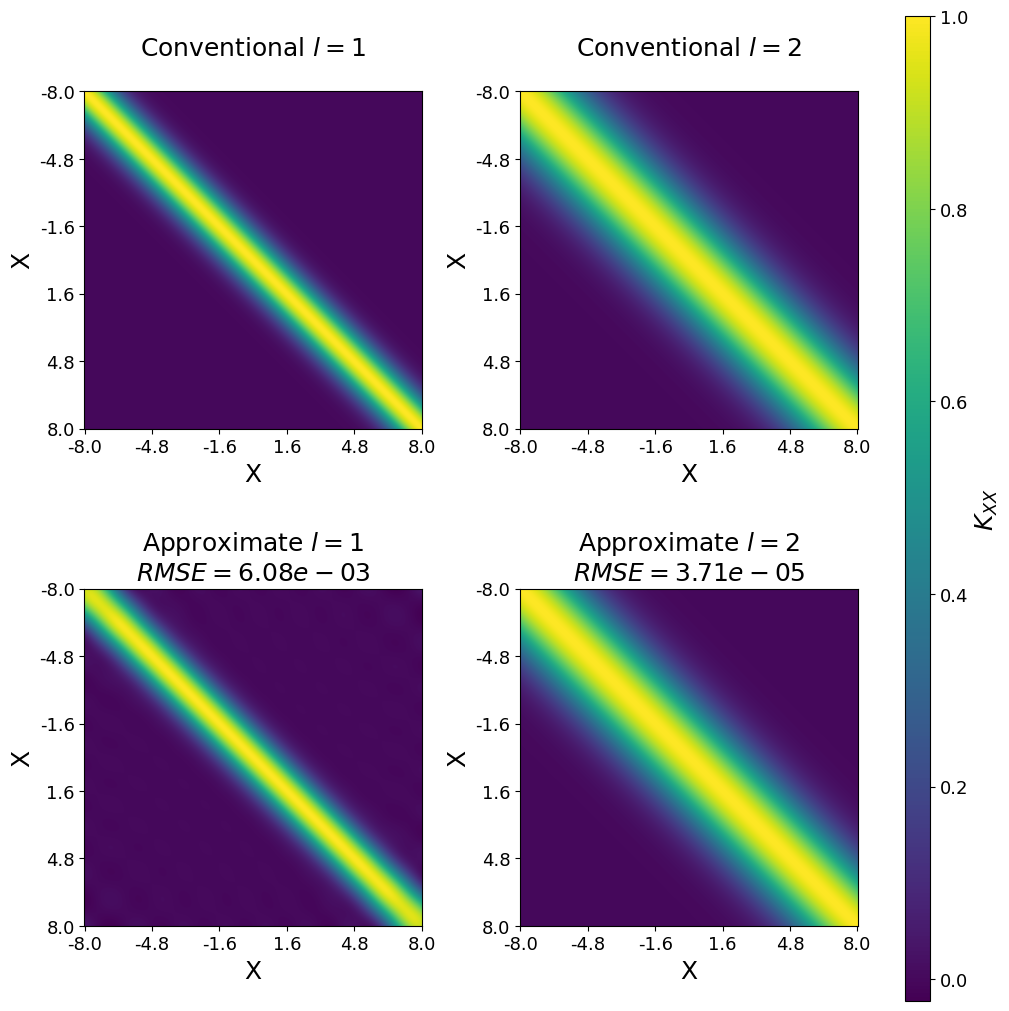

In [60]:
nb_training_points = 1000
x_min = -8
x_max = 8

train_x = torch.linspace(x_min, x_max, nb_training_points).reshape(-1,1)

conv_rbf = RBFKernel()
approx_rbf = RBFKernelApprox(number_of_eigenvalues=15)

with torch.no_grad():
    conv_rbf.lengthscale = 1
    conv_covar_1 = conv_rbf.forward(train_x, train_x).to_dense()

    conv_rbf.lengthscale = 2
    conv_covar_2 = conv_rbf.forward(train_x, train_x).to_dense()

    approx_rbf.lengthscale = 1
    approx_rbf.alpha = 0.25
    approx_covar_1 = approx_rbf.forward(train_x, train_x).to_dense()

    approx_rbf.lengthscale = 2
    approx_covar_2 = approx_rbf.forward(train_x, train_x).to_dense()

    rmse_1 = torch.sqrt(torch.mean((conv_covar_1 - approx_covar_1) ** 2))
    rmse_2 = torch.sqrt(torch.mean((conv_covar_2 - approx_covar_2) ** 2))

    fig, axs = plt.subplots(2, 2, figsize=(10, 10), layout='constrained')
    vmin = torch.min(torch.cat((conv_covar_1, conv_covar_2, approx_covar_1, approx_covar_2))).item()
    vmax = torch.max(torch.cat((conv_covar_1, conv_covar_2, approx_covar_1, approx_covar_2))).item()

    for ax, covar, title in zip(
        axs.reshape(4),
        [
            conv_covar_1.to('cpu'),
            conv_covar_2.to('cpu'),
            approx_covar_1.to('cpu'),
            approx_covar_2.to('cpu')
        ],
        [
            "Conventional $l = 1$\n",
            "Conventional $l = 2$\n",
            f"Approximate $l = 1$\n$RMSE = {rmse_1.item():.2e}$",
            f"Approximate $l = 2$\n$RMSE = {rmse_2.item():.2e}$"
        ]
    ):
        im = ax.imshow(covar.numpy(), cmap=plt.colormaps['viridis'], vmin=vmin, vmax=vmax)

        ax.set_title(title)
        ax.set_xlabel('X')
        ax.set_ylabel('X')
        ax.set_xticks(np.linspace(0, nb_training_points - 1, min(nb_training_points, 6)))
        ax.set_yticks(np.linspace(0, nb_training_points - 1, min(nb_training_points, 6)))
        ax.set_xticklabels(np.round(np.linspace(x_min, x_max, min(nb_training_points, 6)), 2))
        ax.set_yticklabels(np.round(np.linspace(x_min, x_max, min(nb_training_points, 6)), 2))
        ax.grid(False)


    cbar = fig.colorbar(im, ax=axs[:, 1], pad=0.1, aspect=40)
    cbar.ax.set_ylabel('$K_{XX}$')
    path = Path(PLOT_DIR_PATH, "lengthscale.png")
    if not path.parent.exists():
        path.parent.mkdir(parents=True)
    plt.savefig(path)